In [615]:
# Use of IPython.display and HTML for using css to format text in Markdown based on
# www.dataquest.io/blog/advanced-jupyter-notebooks-tutorial
from IPython.display import HTML
HTML(
    "<style>\
    span.str {color:#BA2121; font-style:italic; font-weight:bold;}\
    span.num {color:#080; font-style:italic; font-weight:bold;}\
    span.bltn {color:#080; font-weight:bold;}\
    span.op {color:#AA22FF;}\
    span.func {color:#00F;}\
    h3.yt {color:#009900; font-style:italic;}\
    span.yt {color:#009900; font-style:italic;}</style>"
)

<h2><b><u>Case Study: California Housing Prices </u></b></h2>

<h3><b><i>Goal</i></b></h3>
The goal of this Case Study is to apply supervised machine learning (ML) principles covered in DataCamp's <a href = "https://app.datacamp.com/learn/courses/supervised-learning-with-scikit-learn"> Supervised Learning with scikit-learn course</a> and DASC 2113 lecture. The DataCamp course covers a wide variety of supervised ML techniques for both qualitative and quantitative data. Unforuntately, not all of these techniques can be included in a single Case Study. 

This Case Study will focus on a subset of those supervised ML techniques covered, linear models, for use with quantitative data. Ordinary least squares regression for both univariate and multivariate cases will be introduced, along with lasso regression. This Case Study will also introduce feature selection and the basics of model selection. 

The scenario for this Case Study is to examine housing prices in California, determine which features are useful for modeling housing prices, fit a selected model to the data using these features, and estimate housing prices based on the fitted linear model. 

<h3><b>Data</b></h3>
The 1997 California Housing dataset from Kelley & Barry consists of data gathered from the 1990 US Census for the state of California [1]. There are <span class="num">8</span> <b><i>feature variables</i></b> which represent different attributes in this dataset and <span class="num">1</span> <b><i>target variable</i></b>. These variables are listed in the table below. 

<table style="width:75%">
    <tr>
        <th>Feature Name</th>
        <th>Full Name</th>
        <th>Variable Type</th>
        <th>Areal Unit</th>
        <th>Units</th>
    </tr>
    <tr>
        <td>MedInc</td>
        <td>Median Income</td>
        <td>Feature</td>
        <td>Block Group</td>
        <td>USD (Tens of Thousands)</td>
    </tr>    
     <tr>
        <td>HouseAge</td>
        <td>House Age</td>
        <td>Feature</td>
         <td>Block Group</td>
         <td></td>
    </tr>
    <tr>
        <td>AveRooms</td>
        <td>Average Number of Rooms</td>
        <td>Feature</td>
        <td>Household</td>
        <td></td>
    </tr>
     <tr>
        <td>AveBedrms</td>
        <td>Average Number of Bedrooms </td>
        <td>Feature</td>
        <td>Household</td>
        <td></td>
    </tr>
    <tr>
        <td>Population</td>
        <td>Population of the Block Group</td>
        <td>Feature</td>
        <td>Block Group</td>
        <td></td>  
    </tr>
    <tr>
        <td>AveOccup</td>
        <td>Average Number of Household Members</td>
        <td>Feature</td>
        <td>Household</td>
        <td></td>  
    </tr>
     <tr>
        <td>Lattitude</td>
        <td>Lattitude of Block Group</td>
        <td>Feature</td>
        <td>Degrees</td>
        <td></td>  
    </tr>
    <tr>
        <td>Longitude</td>
        <td>Longitude of Block Group</td>
        <td>Feature</td>
        <td>Degrees</td>
        <td></td>  
    </tr>
    <tr>
        <td>MedHouseVal</td>
        <td>Median House Value</td>
        <td>Target</td>
        <td>Block Group</td>
        <td>Hundreds of Thousands of USD</td>  
    </tr>
    <tr>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td>Source: [2], [4]</td>  
    </tr>
</table>

The California Housing dataset consists of 20,640 samples containing these features [3]. Before beginning this Case Study, read through source [2] for additional details about the dataset. 

Sources: 
<ol style = "font-size:8px">
    <li>Torgo, Luis. Undated. "California Housing". University of Porto. https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html. </li>
    <li>Scikit-learn. 2021. "7.2 Real World Datasets".https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset</li>
    <li>Scikit-learn. 2021. "sklearn.datasets.fetch_california_housing". https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html</li>
    <li>Google Developers. 2021. "California Housing Data Set Description". https://developers.google.com/machine-learning/crash-course/california-housing-data-description</li>
    
   </ol>

<h4><u>Importing Libraries</u></h4>

If you do not already have <b><i>sklearn</i></b> and <b><i>statsmodels</i></b> installed, you will need to do so to complete this Case Study. 

In [616]:
# Import 
from sklearn.datasets import fetch_california_housing
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant


<h4><u>Loading the Data</u></h4>

The <b><i>California Housing</i></b> dataset is included as part of scikit-learn. The Code Cell below shows how to import the dataset. 

In [617]:
# Load dataset
ca_housing = fetch_california_housing()

# See what keys are available. 
print(ca_housing.keys())

# See the type 
print(type(ca_housing))

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
<class 'sklearn.utils.Bunch'>


The imported dataset <b><i>ca_housing</i></b> is a <b><i>Bunch</i></b> object. The <b><i>keys</i></b> are shown to determine which ones to use to access the data needed for this Case Study. Five keys will be used: data, target, target_names, feature_names, and DESCR. 

<h4><u>Data Pre-Processing</u></h4>

A description of the California housing dataset can be seen by using the <i>DESCR</i> key. 

In [618]:
# Get the dataset description
ca_housing.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

The description above includes the attributes (features) for the housing dataset. Two important items regarding features in this dataset are not included in this built in description. The first is that the feature <i>MedInc</i> (median income) is provided in tens of thousands of USD [4]. The second is that the target feature <i>MedHouseVal</i> is in hundreds of thousands of USD[3].

<h4><u>Bunch Object to DataFrames</u></h4>

The attributes of the Bunch object are converted to DataFrames. Two new DataFrames will be created. The first <b><i>ca_df_X</i></b> consists of the feature variables of the dataset. It is created by accessing the <b><i>data</i></b> and <b><i>feature_names</i></b> of the Bunch object. 

In [619]:
# Create a DataFrame holding the features (X)
ca_df_X = pd.DataFrame(ca_housing.data, columns = ca_housing.feature_names)

# See first 5 rows 
ca_df_X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


The second DataFrame consists of the target variable's data. The <b><i>ca_df_y</i></b> is created by accesing the <b><i>target</i></b> and <b><i>target_names</i></b> of the Bunch object. 

In [620]:
# Create a DataFrame holding the target (y)
ca_df_y = pd.DataFrame(ca_housing.target, columns = ca_housing.target_names)

# See first 5 rows 
ca_df_y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


<h4><u>Checking the Data</u></h4>
As always, the data should first be checked to make sure no values are missing and to make sure the correct data types set. 

In [621]:
# Check feature data types 
ca_df_X.info()

# Check target data types
ca_df_y.info()

# Check for any null values 
print(ca_df_X.isnull().values.any())
print(ca_df_y.isnull().values.any())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedHouseVal  20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB
False
False


Everything looks good based on the output above. Let's continue to the next step of splitting the data. 

<h4><u>Dividing data into train and test sets</u></h4> 

Before proceeding any further, the data needs to be split into a train and test set. In this Case Study a validation split will not be used, however in practice it is a good idea to have a train, validation, and test split of the data. 

The data will be split into train and test sets using using scikit-learn's <b>train_test_split</b> function. 80% of the California housing data will be used as the train set and 20% will be used at the test set. The seed for the random generator will be set to 0 using <b><i>random_state</i></b> to make this train/test split reproducible. 

In [622]:
# Split into 80% train and 20% test set. 
train_x, test_x, train_y, test_y = train_test_split(ca_df_X, ca_df_y, test_size = .2, random_state=0)

# Print the shape of the trainining data 
print("Training data shape: ", train_x.shape, train_y.shape)

# Print the shape of the test set
print("Test data shape: ", test_x.shape, test_y.shape)

# Reset index of training data 
train_x.reset_index(inplace = True)
train_y.reset_index(inplace = True)

# Drop index column 
train_x = train_x.drop("index", axis = 1)
train_y = train_y.drop("index", axis = 1)

# Repeat for test set
test_x.reset_index(inplace = True)
test_y.reset_index(inplace = True)
test_x = test_x.drop("index", axis = 1)
test_y = test_y.drop("index", axis = 1)

Training data shape:  (16512, 8) (16512, 1)
Test data shape:  (4128, 8) (4128, 1)


The test data will be held out until the end of training the supervised model. Before deciding on which supervised-training model to use, let's explore the training data to get a better ideal of the features in the dataset.  

<h4><u>Exploratory Data Analysis</u></h4>

Next let's visualize the feature variables and compute their descriptive statistics. The code in this Exploratory Data Analysis section is based on [1].

<p style = "font-size:8px">Additional sources for this section</p>
<ol style = "font-size:8px">
    <li>Scikit-learn Course. 2021. "The California housing dataset". https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html.</li>
   
</ol>

Let's visualize each feature variable's histogram. This can quickly be done using Panda's <b>hist</b> method. 

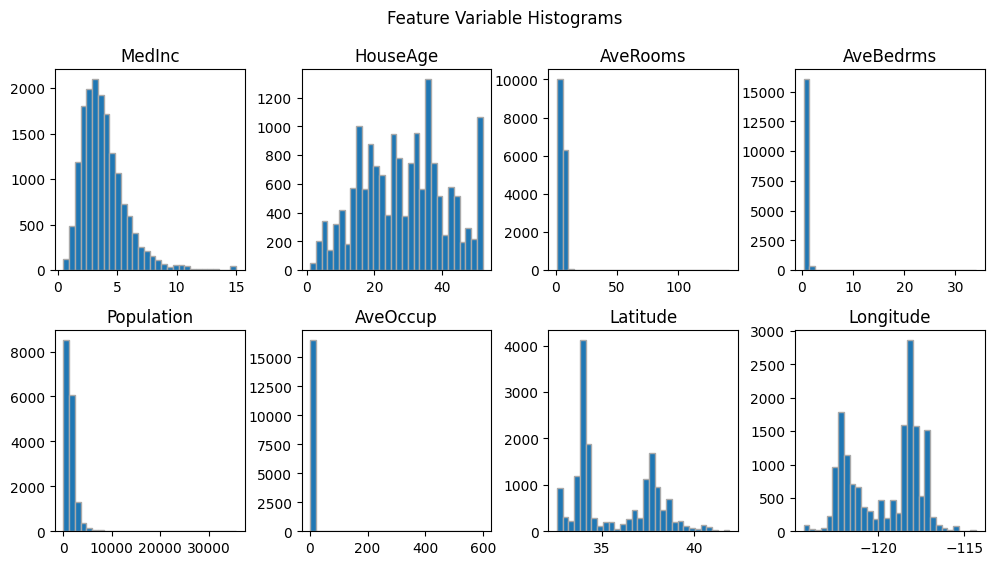

In [623]:
fig, axs = plt.subplots(2, 4, figsize = (12,6))
train_x.hist(grid = False, ax = axs, bins = 30, edgecolor = "darkgrey")
plt.suptitle("Feature Variable Histograms")
plt.show()

Next, a pair plot is created. The <b><i>dfs_combined</i></b> DataFrame used in the Code Cell below, will only be used to visualize this pairplot.  The <b><i>dfs_combined</i></b> DataFrame contains both the feature and target variables in one DataFrame. 

Quartiles are calculated for the target variable <i>MedHouseVal</i> and the midpoint of these kept. The <b><i>dfs_combined</i></b> is then subsampled by selecting 1,000 samples randomly. This is done because the <b>pairplot</b> function maytake awhile to run even when using a subsample. 

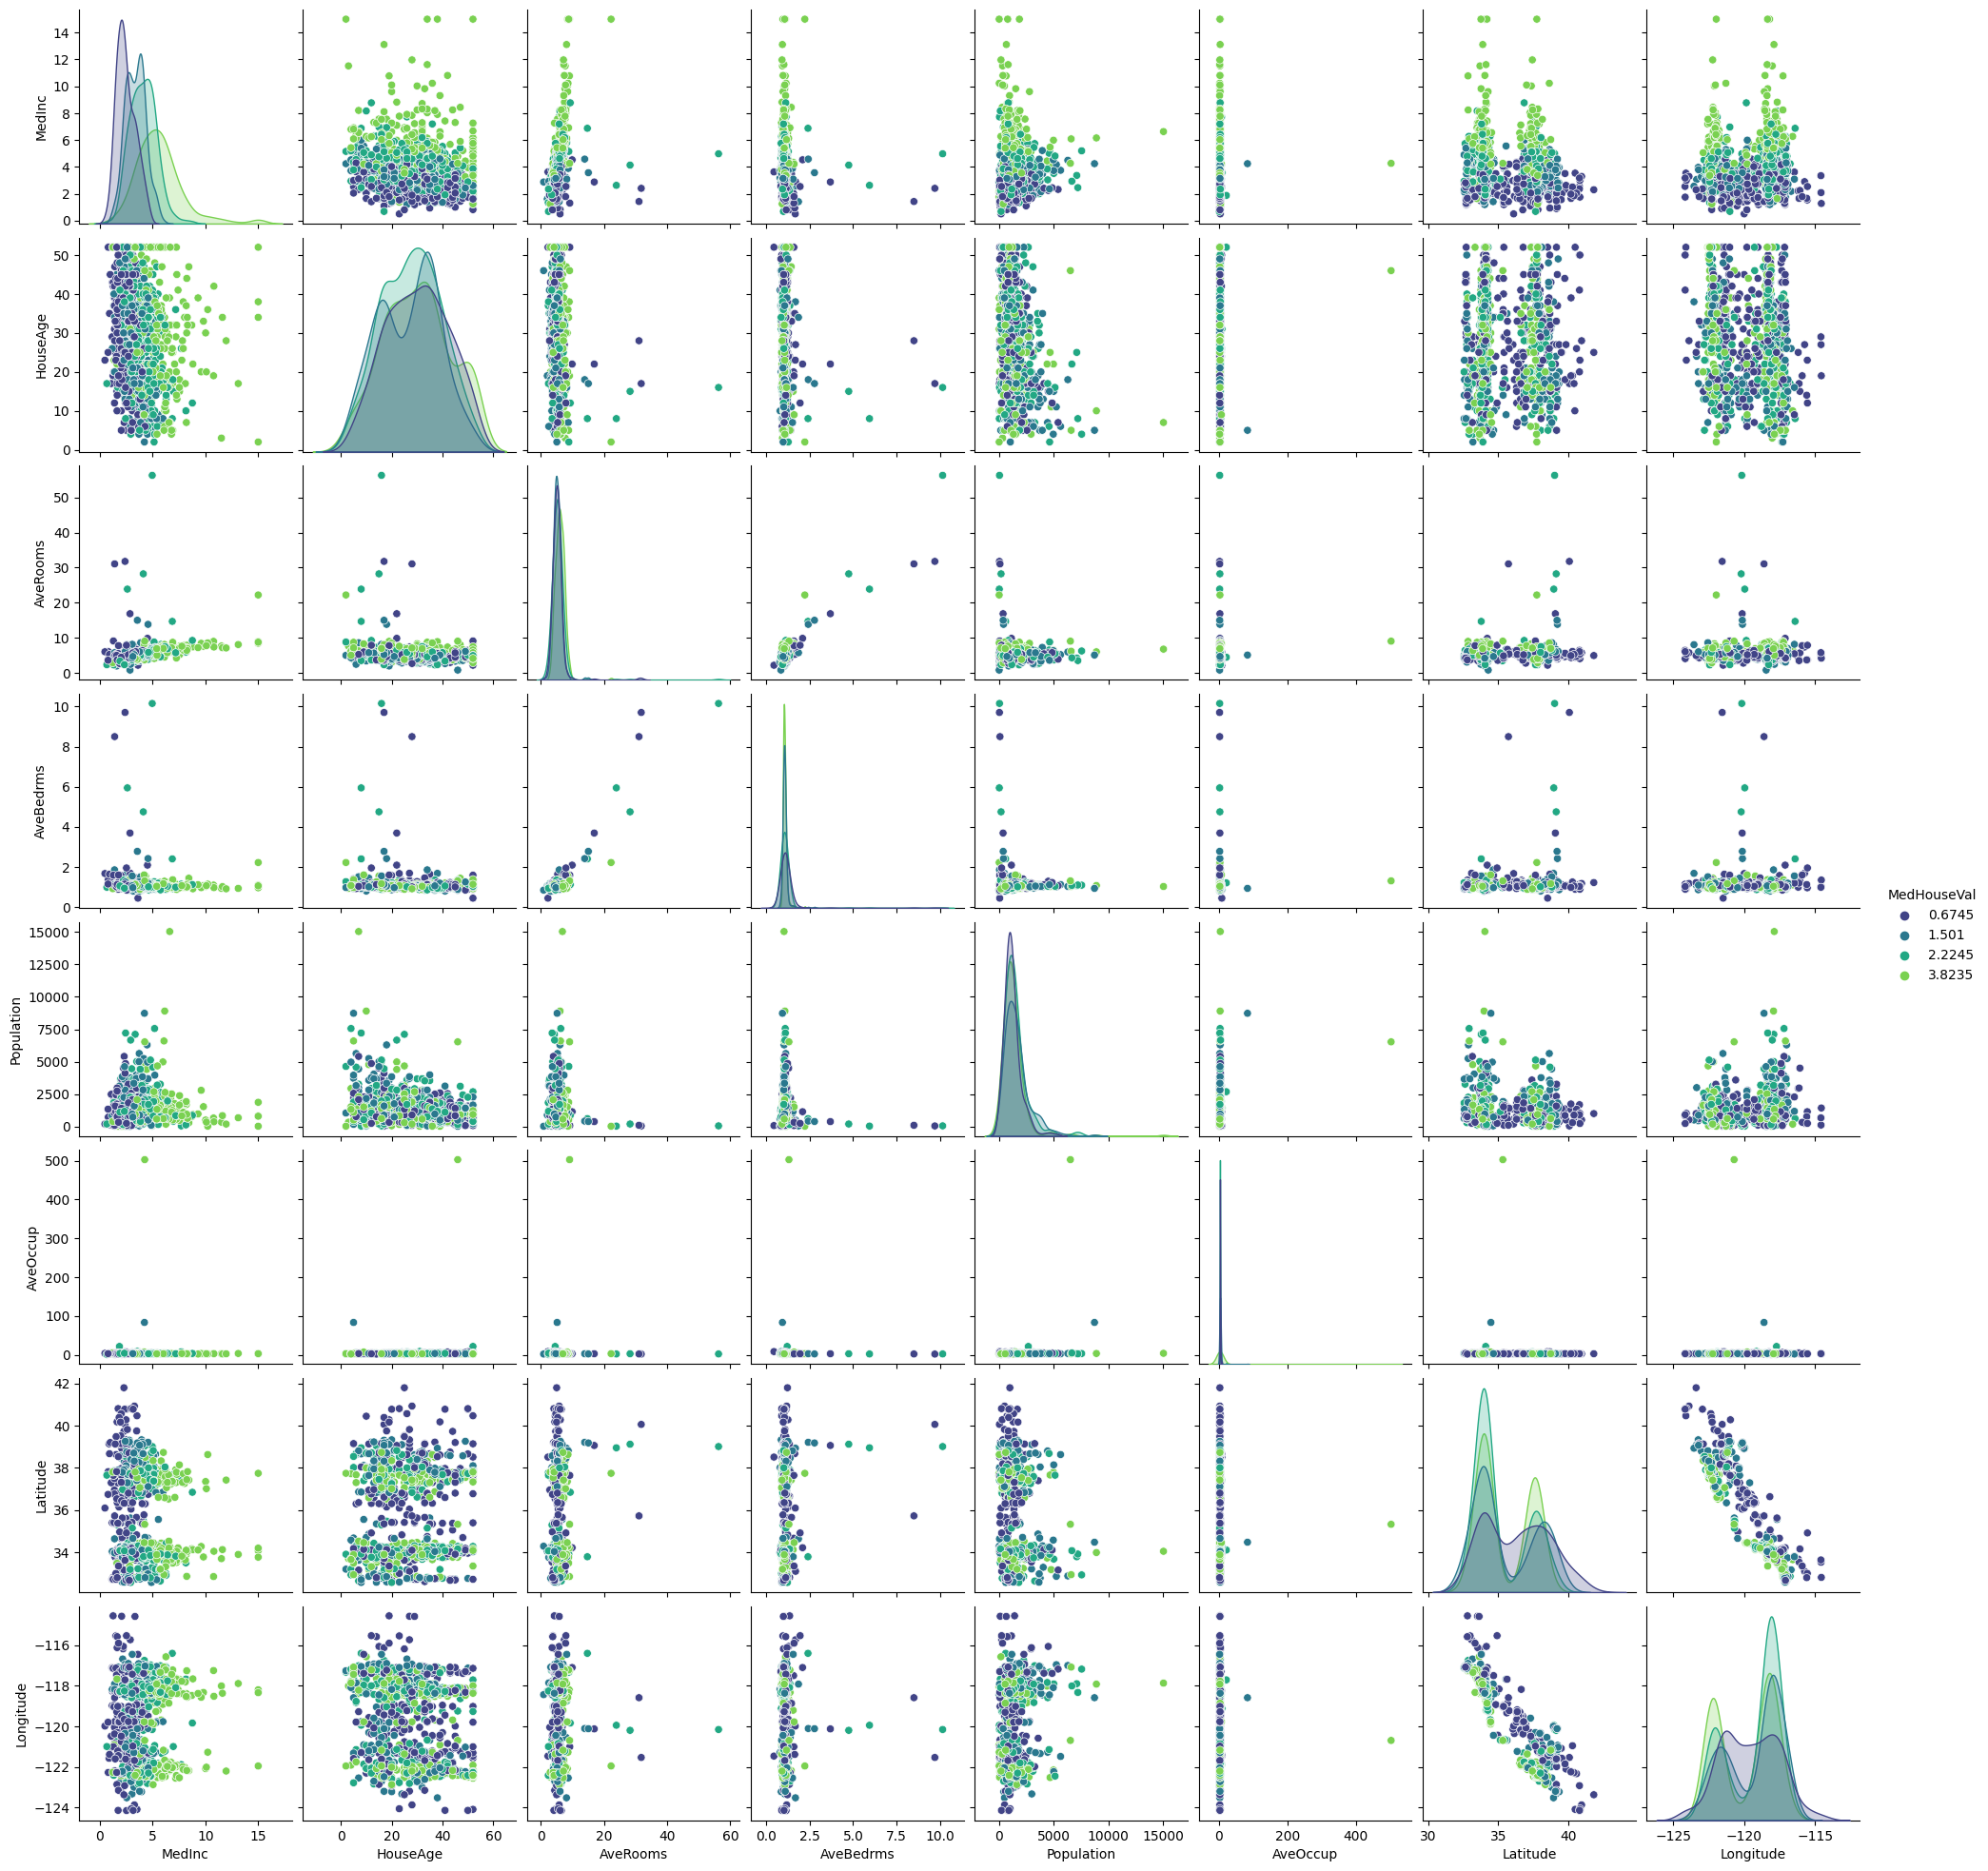

In [624]:
# Create a view combining both data frames only used for this portion
dfs_combined = train_x.copy()
dfs_combined["MedHouseVal"] = train_y["MedHouseVal"]

# Create quartiles for target variable and keep only the midpoint of the quartile
dfs_combined["MedHouseVal"] = pd.qcut(dfs_combined["MedHouseVal"], 4, retbins = False)
dfs_combined["MedHouseVal"] = dfs_combined["MedHouseVal"].apply(lambda x: x.mid)

# Select a subsample because pairplot is taking a very long time to load with the full training set
dfs_combined = dfs_combined.sample(1000, random_state = 0)

# Create the pairplot 
ca_pairplot = sns.pairplot(data = dfs_combined, hue = "MedHouseVal", diag_kind = "kde", palette = "viridis")

The pair plot illustrates two points visually. Based on the pairplot, the <i>MedInc</i> feature appears useful for discerning the different quartiles in <i>MedHouseVal</i> and that there are features that have outliers [1]. 

Finally, let's calculate descriptive statistics for the feature and target variables of the training data. 

In [625]:
# Descriptive statistics for features
print(train_x.describe())

# Descriptive statistics for target
print(train_y.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16512.000000  16512.000000  16512.000000  16512.000000  16512.000000   
mean       3.876298     28.619065      5.432607      1.096174   1425.437742   
std        1.906783     12.600999      2.523415      0.489529   1143.062756   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.566625     18.000000      4.447644      1.005760    785.000000   
50%        3.548500     29.000000      5.234243      1.048720   1166.000000   
75%        4.747575     37.000000      6.059008      1.100000   1724.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  16512.000000  16512.000000  16512.000000  
mean       3.030518     35.624783   -119.563008  
std        6.441340      2.136552      2.005251  
min        0.750000     32.540000   -124.350000  
25%        2.428016     33.930000   -1

<h4><u>Univariate Linear Regression Example</u></h4>

Let's start off by looking at one feature <i>HouseAge</i> to see the relationship between a house's age by block group and the <i>MedHouseVal</i> by block group. As a reminder, the <i>HouseAge</i> is considered the feature variable (independent variable) and the target variable (dependent variable) is <i>MedHouseVal</i>. 

It's true that <i>MedInc</i> is the feature variable that appeared most useful in the pairplot above. However the Univariate Linear Regression Example below is used to illustrate two points. The first is that it shows an example of how a feature variable that is not particuarly useful for estimating the target variable will appear. This is something that you will encounter when working in real-world scenarios. The second is that it shows how useful exploratory data analysis can be in helping select feature variables. 

<h4><u>Univariate Linear Regression</u></h4>

Suppose that your friend is a real-estate agent and has told you that the age of house is the most important factor in determining housing prices for the houses they sell. The California housing dataset has data about the age of houses, so let's use it. 

We know from looking at the data above that both <i>HouseAge</i> and <i>MedHouseVal</i> consist of real-valued data. This means a model such as linear regression could be suitable to use. 

<h4><u>Descriptive Statistics</u></h4>

Before performing linear regression, let's look again at the descriptive statistics on the feature variable <i>HouseAge</i> and the target variable <i>MedHouseVal</i>. 

In [626]:
# Descriptive statistics of feature variable
print(train_x["HouseAge"].describe())

# Descriptive statistics of target variable
print(train_y["MedHouseVal"].describe())

count    16512.000000
mean        28.619065
std         12.600999
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: HouseAge, dtype: float64
count    16512.000000
mean         2.072499
std          1.156915
min          0.149990
25%          1.200000
50%          1.802500
75%          2.647000
max          5.000010
Name: MedHouseVal, dtype: float64


<h4><u>Scatterplot Creation</u></h4>

Next let's create a scatterplot with the <i>HouseAge</i> on the x-axis and <i>MedHouseVal</i> on the y-axis. 

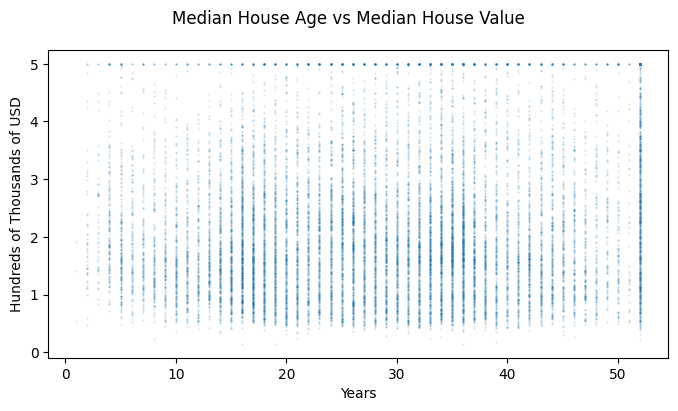

In [627]:
fig, axs = plt.subplots(1,1, figsize = (8,4))
fig.suptitle("Median House Age vs Median House Value")
plt.plot(train_x["HouseAge"], train_y["MedHouseVal"], "o", markersize= .5, alpha = .2)
axs.set_xlabel("Years")
axs.set_ylabel("Hundreds of Thousands of USD")
plt.show()

From the scatterplot it doesn't look like there's much of a relationship between <i>HouseAge</i> and <i>MedHouseVal</i>. 

<h4><u>Correlation: Pearson's r</u></h4>

Let's quanitfy the linear relationship between <i>HouseAge</i> and <i>MedHouseVal</i> using <b><i>Pearson's r</i></b>

In [628]:
# Calculate Pearson's R 
np.corrcoef(x = train_x["HouseAge"], y = train_y["MedHouseVal"])

array([[1.        , 0.10647017],
       [0.10647017, 1.        ]])

The value of the correlation coefficient is.1065 which indicates a weak positive linear relationship between the two variables. This explains the difficulty in discerning any kind of relationship when looking at the scatterplot. This may mean that using the age of the house to predict the value of the house with a linear model may not yield good results. Let's continue anyways and see.  

<h4><u>Fitting the Univariate Linear Regression Model</u></h4>

In the example below, we'll perform univariate linear regression using Scikit-learn's <b>LinearRegression</b> class. Although this is the default behavior, <b>fit_intercept</b> will be specified to True so the function can fit the y-intercept. 

Instead of using the DataFrame, the feature variable and target variable of interest will be converted to NumPy arrays. This will save having to type values.reshape(-1,1) everytime this variable is used with the scikit-learn functions in this Case Study. The <b>fit</b> method is used to fit the linear model to the data. 

In [629]:
# Create NumPy arrays for use 
ha_train_x = train_x["HouseAge"].values.reshape(-1,1)
hv_train_y = train_y["MedHouseVal"].values.reshape(-1,1)

# LinearRegression object 
reg_obj = LinearRegression(fit_intercept = True)
reg_obj.fit(ha_train_x, hv_train_y)

print(reg_obj.coef_)
print(reg_obj.intercept_)

[[0.00977517]]
[1.79274263]


The fitted regression model can be represented by the equation y = .0098x + 1.7827 when rounded to 4 decimal places. 

<h4><u>Estimating Median House Value</u></h4>

The estimated y-values (target values) can either be calculated manually or by using the LinearRegression's <b>predict</b> function. Both will produce equivalent values. The Code Cell below shows an example of both with a generated series of numbers within the range of <i>HouseAge</i> values. 

In [630]:
# Generate a range of possible housing ages from 0 to the maximum age on record 
age_range = np.arange(0, (train_x["HouseAge"].max() + .1), .1)

# Calculate predictions of median house value using the fitted linear regression equation 
pred_house_val = (reg_obj.coef_ * age_range) + reg_obj.intercept_

# Transpose from row vector to column vector 
pred_house_val = pred_house_val.transpose()

# Could also use predict function 
pred_house_val_2 = reg_obj.predict(age_range.reshape(-1,1))

# Showing that the results are equal with both as column vectors 
print(np.array_equal(pred_house_val, pred_house_val_2))

True


<h4><u>Visualizing the Line of Best Fit</u></h4>

Next, let's plot the fitted regression line over the training data. 

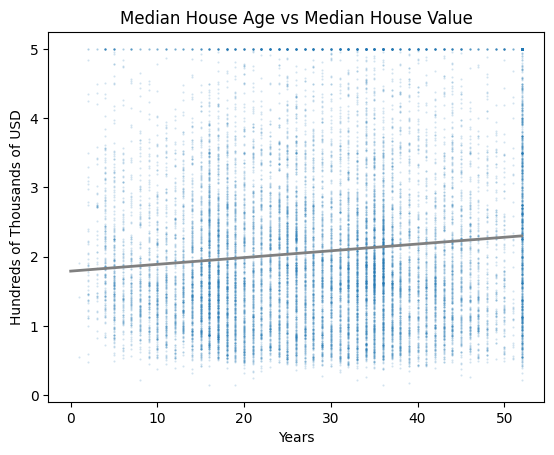

In [631]:
plt.title("Median House Age vs Median House Value")
plt.plot(train_x["HouseAge"], train_y["MedHouseVal"], "o", alpha = .2, markersize = .5)
plt.plot(age_range, pred_house_val, color = "grey", linewidth = 2)
plt.xlabel("Years")
plt.ylabel("Hundreds of Thousands of USD")
plt.show()

<h4><u>Evaluating Model Fit</u></h4>

The median age of a house does not look like a very useful feature on its own to add to our linear regression model. Let's use the fitted model on the test data and calculate the <b><i>mean squared error (MSE)</i></b>, <b><i>root mean square error (RMSE)</i></b>, and the <b><i>coefficient of determination (R^2)</i></b> value for the fitted model. 

<p style = "font-size:8px">Additional sources for this section</p>
<ol style = "font-size:8px">
    <li>Scikit-learn. 2021. https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error</li>
    <li>Scikit-learn. 2021. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html</li>
    <li>Statistics How To. 2021. https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/</li>
    <li>Holmes, Suan. 2000. "RMSE Error". https://statweb.stanford.edu/~susan/courses/s60/split/node60.html.</li>
    <li>Scikit-learn. 2021. https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score</li>
   
</ol>

In [632]:
# Create NumPy arrays from test data so don't have to use values.reshape(-1,1) every time
ha_test_x = test_x["HouseAge"].values.reshape(-1,1)
hv_test_y = test_y["MedHouseVal"].values.reshape(-1,1)

# Make prediction using the test set 
pred_y = reg_obj.predict(ha_test_x)

# Calculate MSE
mse_test = mean_squared_error(hv_test_y, pred_y)
print(mse_test)

# Calculate RMSE
rmse_test = mean_squared_error(hv_test_y, pred_y, squared = False)
print(rmse_test)

# Calcualte R2
r2_test = r2_score(hv_test_y, pred_y)
print(r2_test)

1.2907683845430629
1.1361198812374789
0.010112709993501445


The mean squared error computes the loss of the fitted model between the predicted target values and the observed target values on the test set. The equation comptued by the <b>mean_squared_error</b> function is available at [1]. The closer the MSE value is to 0, the better the fit of the linear model [2]. 

The root mean squared error measures the spread of the residuals and uses the same units as <i>MedHouseVal</i> [3],[4]. Like MSE, the closer the RMSE is to 0, the better the linear model fits. 
    
The value computed for R^2 indicates that the feature <i>HouseAge</i> is not a useful feature for predicting <i>MedHouseVal</i>. The value of R^2 is .01. This means that our fitted model does almost as bad as a model that predicts a constant horizontal line [5].


<h4><u>What to do Differently?</u></h4>

The median age of a house was not a useful feature for determining housing price on its own. Although nothing techincally went wrong in the analysis above, it did take some time to do. One thing that could have been done differently is that before selecting which feature to use, the <b><i>correlation coefficient</i></b> could have been calculated. 

<h4><u>Selecting Features with the Correlation Coefficient</u></h4>

Calculating the correlation coefficient, in this case <b><i>Pearson's r</i></b> between the target variable <i>MedHouseVal</i> and the feature variables in the dataset can give us a starting point of which features might be useful in linear regression. Recall, that Pearson's r can be used for two variables to calculate the strength and direction of their linear relationship <a href= "https://online.stat.psu.edu/stat200/lesson/3/3.4/3.4.2">[1]</a>. Let's calculate r in the Code Cell below. 

<p style = "font-size:8px">Sources for this section:</p>
<ol style = "font-size:8px">
    <li>Penn State. 2021."3.4.2 - Correlation". STAT 200.https://online.stat.psu.edu/stat200/lesson/3/3.4/3.4.2" </li>
</ol>

In [633]:
train_x.corrwith(train_y["MedHouseVal"], method = "pearson")

MedInc        0.692758
HouseAge      0.106470
AveRooms      0.154426
AveBedrms    -0.044415
Population   -0.027053
AveOccup     -0.033169
Latitude     -0.142702
Longitude    -0.047277
dtype: float64

The output above shows one feature that has a <b><i>strong positive linear relationship</i></b> between <i>MedHouseVal</i> and median income <i>MedInc</i>. All other features have a <b><i>very weak linear relationship</i></b> with <i>MedHouseVal</i>. 

<h4><u>5-Folds Cross-Validation</u></h4>

Let's go back to the <i>HouseAge</i> feature. Let's say we didn't calculate Pearson's r above and thought that the low R^2 value from using the House Age feature was just a result of the training data split. One thing we could do is run K-folds cross-validation on the training data and see what the cross-validation score is for each split of the data. 

One additional class will be used for this compared to what you've seen in DataCamp. The <b>RepeatedKFold</b> class will be used to generate the k-folds of data. This class allows us to create a RepeatedKFoldobject and specify the random state used to generate the k-folds which makes the cross-validation repeatable [1]. This is useful when working through the Case Study as a class. In this Case Study, the number of splits (folds) is set to <span class="num">5</span> and the number of repeats is setto <span class="num">5</span>. The returned RepeatedKFold object is then passed to the <b>cross_val_score</b> function where R^2 for that split of the data is calculated and returned. The R^2 is returned because it is the default calcualted score for the Linear Regression object [2]. 


<p style = "font-size:8px">Sources for this section outside of DataCamp:</p>
<ol style = "font-size:8px">
    <li>Brownlee, Jason. 2020. "Repeated k-Fold Cross-Validation for Model Evaluation in Python". Machine Learning Mastery. https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/. </li>
    <li>Scikit-learn. 2021. "sklearn.linear_model.LinearRegression". https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html</li>
</ol>

In [634]:
# Linear regression object
reg_age = LinearRegression()

# Split the data into 5 parts and repeat this 5 times
cv_split = RepeatedKFold(n_splits = 5, n_repeats = 5, random_state = 0)

# Returns R^2 for each split. 
cv_results = cross_val_score(reg_age, ha_train_x, hv_train_y, cv = cv_split)

# Print the average R^2 for the 5-folds cross validation
print(np.mean(cv_results))



0.010781074618958093


The average R^2 for the 5-fold cross-validation is approximately .0108 which is very close to .0101 from above. This means that the splitting of the training set was not the cause of the low R^2 score and that <i>HouseAge</i> really is not a useful feature for determining housing price on its own. 

Recall that in the previous calculation of Pearson's r between the target variable <i>MedHouseVal</i> and each feature variable in the dataset, that <i>HouseAge</i> only had a value of .1065.Let's take a look at the feature variable that had the largest value of Pearson's r, median income <i>MedInc</i>, as the feature variable instead. 

<h4><u>Univariate Linear Regression: Example 2</u></h4>

The feature variable with the strongest linear relationship from the California housing data was <i>MedInc</i>. TThe value for Pearson's r was .6928 which indicates a strong positive linear relationship between <i>MedInc</i> and <i>MedHousVal</i>. Additionally, the pair plot created above indicated that <i>MedInc</i> could be useful. 

<h4><u>Scatterplot of Variables</u></h4>


First, let's create a scatterplot between the two variables. 

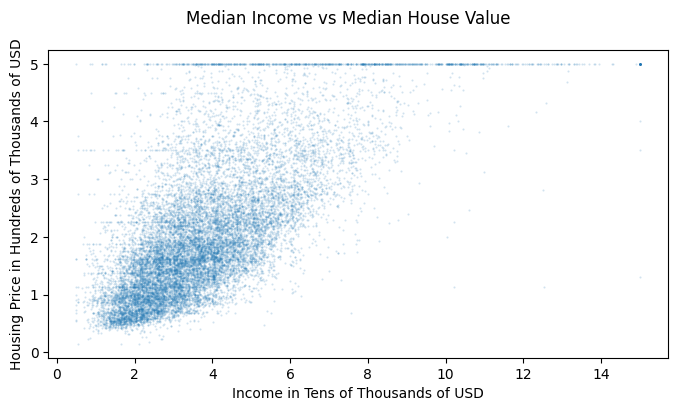

In [635]:
fig, axs = plt.subplots(1,1, figsize = (8,4))
fig.suptitle("Median Income vs Median House Value")
plt.plot(train_x["MedInc"], train_y["MedHouseVal"], "o", markersize= .5, alpha = .2)
axs.set_xlabel("Income in Tens of Thousands of USD")
axs.set_ylabel("Housing Price in Hundreds of Thousands of USD")
plt.show()

The relationship between <i>MedInc</i> and <i>MedHouseVal</i> is much easier to see in this scatterplot. As median income of the block group increases, there is a positive increase in the median house price for that block group. Let's also review the descriptive statistics for <i>Med Inc</i>. 

<h4><u>Descriptive Statistics</u></h4>

In [636]:
# Descriptive statistics of feature variable
print(train_x["MedInc"].describe())

count    16512.000000
mean         3.876298
std          1.906783
min          0.499900
25%          2.566625
50%          3.548500
75%          4.747575
max         15.000100
Name: MedInc, dtype: float64


From the statistics, the mean average income for a block group is around \\$38,762.98 USD. The lowest average income for a block group is \\$4,999.00 USD and the highest average income for a block group \\$150,001.00 USD. 

<h4><u>5-Folds Cross-Validation</u></h4>

Next let's repeat the 5-folds cross-validation with <i>MedInc</i> as the feature variable to see if there is any improvement in the R^2 values. 

In [637]:
# Convert to NumPy array 
mi_train_x = train_x["MedInc"].values.reshape(-1,1)
# Linear regression object
reg_inc = LinearRegression()

# Split the data into 5 parts and repeat this 5 times
cv_split = RepeatedKFold(n_splits = 5, n_repeats = 5, random_state = 0)

# Returns R^2 for each split. 
cv_results_inc = cross_val_score(reg_inc, mi_train_x, hv_train_y, cv = cv_split)

# Print the average R^2 for the 5-folds cross validation
print(np.mean(cv_results_inc))

0.47957614329797266


The average R^2 value for <i>MedInc</i> as the feature variable is .4796 which is much closer to 1 than the .01 values for <i>HouseAge</i>. Let's train our linear regression model now to use this variable. 

<h4><u>Fitting the Model</u></h4>

In [638]:
# LinearRegression object 
reg_obj_inc = LinearRegression(fit_intercept = True)
reg_obj_inc.fit(mi_train_x, hv_train_y)

print(reg_obj_inc.coef_)
print(reg_obj_inc.intercept_)

[[0.42032178]]
[0.44320635]


The fitted linear model can be represented by the equation: y = .4203x + .4423. Now let's plot the regression line over the scatterplot. 

<h4><u>Plotting the Line of Best Fit</u></h4>

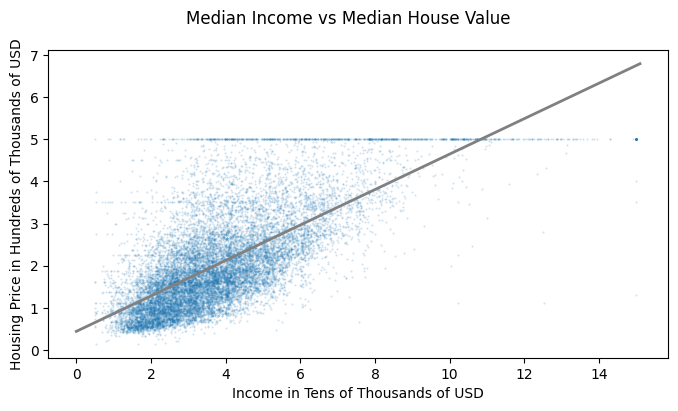

In [639]:
fig, axs = plt.subplots(1,1, figsize = (8,4))
fig.suptitle("Median Income vs Median House Value")
plt.plot(train_x["MedInc"], train_y["MedHouseVal"], "o", markersize= .5, alpha = .2)
axs.set_xlabel("Income in Tens of Thousands of USD")
axs.set_ylabel("Housing Price in Hundreds of Thousands of USD")

# Generate a range of possible incomes from 0 to the maximum age on record 
inc_range = np.arange(0, (train_x["MedInc"].max() + .1), .1)

# Predict housing value
pred_house_val = reg_obj_inc.predict(inc_range.reshape(-1,1))

# Plot regression line
plt.plot(inc_range.reshape(-1,1), pred_house_val, color = "grey", linewidth = 2)

plt.show()

Visually, this regression line fits the data much better than the previous one did. 

<h4><u>Evaluating Model Fit</u></h4>

Let's calculate the R^2 and MSE values on the test data. 

In [640]:
# Make prediction using the test set 
mi_test_x = test_x["MedInc"].values.reshape(-1,1)

pred_y_inc = reg_obj_inc.predict(mi_test_x)

# Calculate MSE
mse_test = mean_squared_error(hv_test_y, pred_y_inc)
print(mse_test)

# Calculate RMSE
rmse_test = mean_squared_error(hv_test_y, pred_y_inc, squared = False)
print(rmse_test)

# Calcualte R2
r2_test = r2_score(hv_test_y, pred_y_inc)
print(r2_test)


0.7214982234014606
0.8494105152406937
0.4466846804895943


The MSE for the model where <i>MedIncome</i> is the feature variable is lower than the MSE for the model where <i>HouseAge</i> is the feature variable. The R^2 value is higher for the model where <i>MedIncome</i> is the feature variable. This indicates that the second linear model is better. 

<h4><u>Select Features with Lasso Regression</u></h4>

DataCamp's Chapter 2 covered using <b><i>Lasso Regression</i></b> as a way to determine which feature to select for a model. Let's apply this to the California Housing Dataset and see which feature is selected. <b><i>Alpha</i></b> is the parameter for the lasso regression model [1]. In this example, we'll go with the value of .001, however alpha can be fine-tuned using cross-validation. Also, for this example the data not normalized in order to more easily show the predicted values, however data should be normalized for lasso regression in most cases.  


<p style = "font-size:8px">Additional sources for this section</p>
<ol style = "font-size:8px">
    <li>Scikit-learn. 2021. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html</li>
</ol>

<h4><u>Fitting the Model</u></h4>

In [641]:
# Instantiate Lasso Object 
lasso_reg = Lasso(alpha = 1, fit_intercept = True)

# Fit on training data
lasso_reg.fit(train_x, train_y)

# Extract coef
lasso_coef = lasso_reg.coef_

# Get column names for feature names 
cols = train_x.columns

# Create DataFrame of the features and the resulting coefficients 
lasso_results = pd.DataFrame(lasso_coef, cols, columns = ["Coef"]) 

# Print sorted DataFrame 
lasso_results.sort_values(by = "Coef", ascending = False)

,Coef
MedInc,0.149781
HouseAge,0.005873
AveRooms,0.000000
AveBedrms,-0.000000
AveOccup,-0.000000
Latitude,-0.000000
Longitude,-0.000000
Population,-0.000008


The result of lasso regression with alpha = 1 on the normalized data, shows that <i>MedInc</i> is the most important feature followed by <i>HouseAge</i>. All other features have had their coefficients shrunk to 0. 

<h4><u>Selecting Alpha for Lasso Regression using Cross-Validation</u></h4>

In the example above, Lasso Regression was only used to select features. Let's again use Lasso Regression, but instead of specifying the <b><i>alpha</i></b> parameter, alpha will be calculated using cross-fold validation with the <b><i>LassoCV</i></b> object. 

The number of splits in the data is set to 5 by specifying this for cv. The training data are also normalized and the random state set to 0 to make this repeatable. The result is then fit on the training data. The code for this portion is based on [1], [2]. 

<p style = "font-size:8px">Additional sources for this section</p>
<ol style = "font-size:8px">
    <li>Scikit-learn. 2021. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html</li>
    <li>Scikit-learn. 2021. https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV</li>
    <li>Penn State. 2021. https://online.stat.psu.edu/stat462/node/131/</li>
</ol>


In [642]:
# Lasso reg. cross-fold validation object. 
lasso_reg_cv = LassoCV(cv= 5, random_state=0, fit_intercept = True).fit(train_x, train_y["MedHouseVal"])

Now that the model is fit, let's check which value was selected for alpha and what the coefficients were for that particular alpha. The score for the model which is R^2 in the case of lasso regression is also checked. 

In [643]:
print("Selected alpha: ", lasso_reg_cv.alpha_)
print("R^2 of the model: ", lasso_reg_cv.score(train_x, train_y["MedHouseVal"]))

# Create DataFrame of the features and the resulting coefficients to make it easier to see
lasso_cv_results = pd.DataFrame(lasso_reg_cv.coef_, cols, columns = ["Coef"]) 

# Print sorted DataFrame 
lasso_cv_results.sort_values(by = "Coef", ascending = False)

Selected alpha:  0.03577400513173498
R^2 of the model:  0.5929687839875066


,Coef
MedInc,3.838993e-01
HouseAge,1.139795e-02
AveRooms,1.568845e-03
AveBedrms,0.000000e+00
Population,-4.074694e-07
AveOccup,-4.610253e-03
Longitude,-3.239395e-01
Latitude,-3.241682e-01


The value selected by the cross-fold validation process is much smaller than the alpha value of 1 used previously. This alpha also includes all coefficients in the model as none are set to 0. The value of R^2 is .5930, but does this mean that the fitted lasso regression model is better than the univariate linear regression model which had an average R^2 of 0.4796 on the training data? 

This increase in R^2 does not necessarily mean this model is better. Adding more feature variables to the model will cause R^2 to either remain constant or increase [3]. This means that features that are not useful for predicting the target feature may still increase R^2.

As a last step, let's check the fitted lasso regression model on the test data. 

In [644]:
# Predict on the test data using the fitted lasso regression model
y_hat_lasso = lasso_reg_cv.predict(test_x)

# Calculate MSE
mse_test_lasso = mean_squared_error(hv_test_y, y_hat_lasso)
print(mse_test_lasso)

# Calculate RMSE
rmse_test_lasso = mean_squared_error(hv_test_y, y_hat_lasso, squared = False)
print(rmse_test_lasso)

# Calcualte R2
r2_test_lasso = r2_score(hv_test_y, y_hat_lasso)

0.5594157721934995
0.7479410218683686


<h4><u>Select Features with SelectKBest</u></h4>

Let's say that you now want to try a multi-variate linear regression model that uses two features. Scikit-learn has a built in function that can select those features automatically based on a user-provided metric. To select two features, <b><i>k</i></b> is specified  as 2. The model these are being selected for is linear regrsesion, so the score used to select the features is the F-statistic which is calculated for each feature [3]. 

The code in this section is based on [1], [2]. 

<p style = "font-size:8px">Additional sources for this section</p>
<ol style = "font-size:8px">
    <li>Scikit-learn. 2021. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest.transform</li>
<li>Scikit-learn. 2021. 
https://stackoverflow.com/questions/39839112/the-easiest-way-for-getting-feature-names-after-running-selectkbest-in-scikit-le</li>
    <li>Scikit-learn. 2021.https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression</li>

Let's take a closer look at what the <b><i>SelectKBest</i></b> function is actually doing. 

In [645]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

best_feat = SelectKBest(score_func = f_regression, k = 2).fit(train_x, train_y["MedHouseVal"])
print("F-statistic for each feature:\n ", best_feat.scores_)

# This code below from:
#https://stackoverflow.com/questions/39839112/the-easiest-way-for-getting-feature-names-after-running-selectkbest-in-scikit-le
cols_selected = best_feat.get_support(indices = True)
print("Selected indices:", cols_selected)
train_x.iloc[:,cols_selected].head()


F-statistic for each feature:
  [1.52347577e+04 1.89301566e+02 4.03339615e+02 3.26341919e+01
 1.20923205e+01 1.81838098e+01 3.43198328e+02 3.69846043e+01]
Selected indices: [0 2]


,MedInc,AveRooms
0,4.2386,7.723077
1,4.3898,5.326622
2,3.9333,4.668478
3,1.4653,3.383495
4,3.1765,4.119792


The <b><i>SelectKBest</i></b> computes the F-statistic for each feature in the fitted training data. The resulting score (F-statistic) for each feature is then printed by accessing the <b><i>scores_</i></b> attribute. Next, the <b><i>get_support</i></b> method is usedto return the indices of the selected features. These are then used to extract the selected features into a new DataFrame. Let's fit a new model using the two selected features. 

<h4><u>Multi-variate Linear Regression</u></h4>
Let's fit a linear model using the feature variables <i>MedInc</i> and <i>AveRooms</i>. 

In [646]:
# Fit model
multivar_reg = LinearRegression(fit_intercept = True).fit(train_x.iloc[:, cols_selected], train_y["MedHouseVal"])

# Print coefficients of fitted model 
print(multivar_reg.coef_)
print(multivar_reg.intercept_)

[ 0.43528648 -0.03511612]
0.5759707629309283


The equation of the fitted model is in the form: y = .4353x1 + -.0351x2 + .5670. This equation can be interpreted as follows: 

When all other variables are held constant, there is a .4353 increase in <i>Median House Value</i> with a one-unit increase in <i>Median Income</i>. When all other variables are held constant, there is a -.0351 decrease in <i>Median House Value</i> with a one-unit increase in <i>Average Rooms</i>. When both <i>Median Income</i> and <i>Average Rooms</i> are 0, the <i>Median House Value</i> is .5670. 

One thing you may have noticed is that the coefficient for <i>AveRooms</i> is negative, but the correlation coefficient between <i>AveRooms</i> and <i>MedHouseVal</i> is positive. For this class, we will not get into the details of why this may occur, however you should be aware that there are several reasons that it could occur that should be investigated further. 

Now let's calculate the three metrics of <b><i>MSE, RMSE, and R^2</i></b> for the model on the test data. 

In [647]:
# Make prediction using the test set 
pred_y = multivar_reg.predict(test_x.iloc[:, cols_selected])

# Calculate MSE
mse_test = mean_squared_error(hv_test_y, pred_y)
print(mse_test)

# Calculate RMSE
rmse_test = mean_squared_error(hv_test_y, pred_y, squared = False)
print(rmse_test)

# Calcualte R2
r2_test = r2_score(hv_test_y, pred_y)
print(r2_test)

0.7101927490883555
0.8427293450974372
0.4553548226034325


This model has a lower MSE and RMSE and a higher R^2 compared to the two univariate models, however we still can't directly compare this multivariate regression model to the univariate models using these.

In the Code Cell below, the fitted multivariate regression model will be used to estimate the <i>MedHouseVal</i> for a <i>MedInc</i> of 3.14 and a <i>AveRooms</i> value of 5. 

In [648]:
# Estimate the MedHouseVal
est_val = multivar_reg.predict(np.array([3.14, 5.0]).reshape(-1,2))

print(est_val * 100000)


[176718.97184862]


C:\Users\jmbreche\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Based on the fitted model, the median house value per block group for a house with 5 average rooms and a median income of 31,400USD is estimated to be 176,718.97USD. 

<h4><u>Focus on the Statistics</u></h4>

Scikit-learn is a great tool to use for supervised machine learning which has been the focus of this Case Study. If you'd like to focus more on the statistical side of things though, another good module is <b><i>statsmodel</i></b>. The Code Cell below shows a summary of the fitted regression model for <i>MedInc</i> as the feature variable when using statsmodel. 

You don't have to use statsmodel in this Case Study, just know that it's available and easy to use if you're interested in a more statistical interpretation of linear regression. 

In [649]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

#https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
regr = OLS(train_y["MedHouseVal"].values, add_constant(train_x["MedInc"].values)).fit()
regr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                 1.523e+04
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:17:01   Log-Likelihood:                -20438.
No. Observations:               16512   AIC:                         4.088e+04
Df Residuals:                   16510   BIC:                         4.090e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4432      0.015     30.128      0.000       0.414       0.472
x1             0.4203      0.003    123.429      0.000       0.414       0.427
==============================================================================
Omnibus:                     3365.372   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7363.886
Skew:                           1.179   Prob(JB):                         0.00
Kurtosis:                       5.267   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h3 class="yt">Your Turn</h3>

The <i>California Housing data</i> will be used in this <span class = "yt">Your Turn</span>. You will need to apply the techniques in this Case Study to different subsets of feature variables as specified. 


<h3 class="yt">Your Turn - 1</h3>

Split the feature dataframe <b><i>ca_df_X</i></b> and the target dataframe <b><i>ca_df_y</i></b> into a new training and test set with 80% of the data as training data and 20% as test. Set the <b>random_state</b> to <span class = "num">5</span>. 

In [650]:
# Your Turn - 1

# Split into 80% train and 20% test set. 
train_x, test_x, train_y, test_y = train_test_split(ca_df_X, ca_df_y, test_size = .2, random_state=5)

<h3 class="yt">Your Turn - 2</h3>

Create histograms for each feature variable in the <b><i>training data</i></b> that you created in <span class = "yt">Your Turn 1</span>. Set the number of <b><i>bins</i></b> to <span class = "num">25</span>.

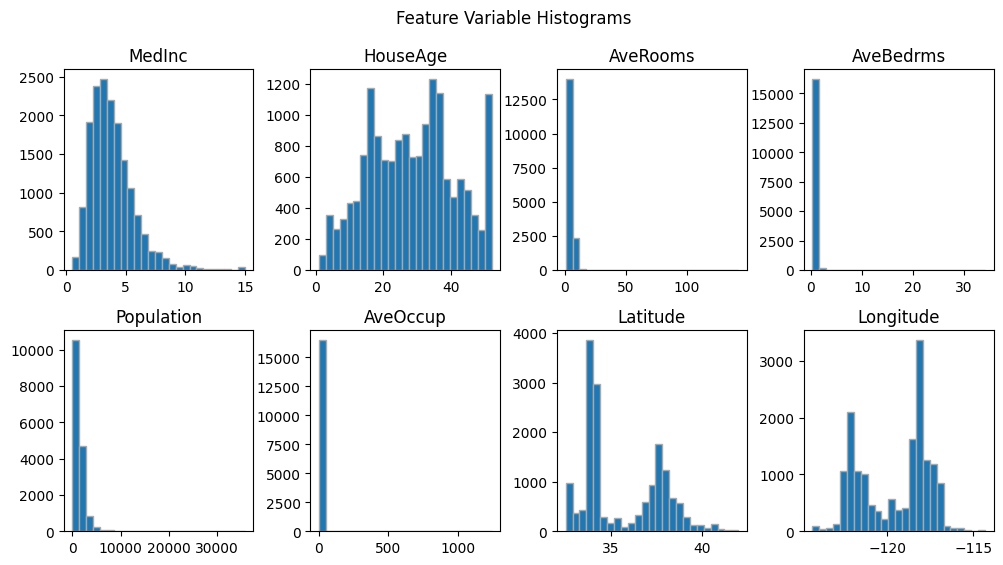

In [651]:
# Your Turn - 2

fig, axs = plt.subplots(2, 4, figsize = (12,6))
train_x.hist(grid = False, ax = axs, bins = 25, edgecolor = "darkgrey")
plt.suptitle("Feature Variable Histograms")
plt.show()

<h3 class="yt">Your Turn - 3</h3>

Calculate the <b><i>correlation coefficient</i></b> between each feature variable and the target variable in the <b><i>training data</i></b>. 

Briefly discuss your results for <span class = "yt">Your Turn - 3</span>. 

In [652]:
# Your Turn - 3

train_x.corrwith(train_y["MedHouseVal"], method = "pearson")

MedInc        0.685853
HouseAge      0.098309
AveRooms      0.150041
AveBedrms    -0.041913
Population   -0.019298
AveOccup     -0.026637
Latitude     -0.140423
Longitude    -0.050930
dtype: float64

<b><i>Your Turn 3 - Additional Answer</i></b>

The output above shows one feature that has a <b><i>strong positive linear relationship</i></b> between <i>MedHouseVal</i> and median income <i>MedInc</i>. All other features have a <b><i>very weak linear relationship</i></b> with <i>MedHouseVal</i>.

<h3 class="yt">Your Turn - 4</h3>

Select a single feature variable from the <b><i>training data</i></b>. Fit a univariate linear regression model to this feature variable. 

Justify the selection of the feature variable that you picked. What is the equation represented by the fitted linear regression model? 

In [653]:
# Your Turn - 4

# Convert to NumPy array
mi_train_x = train_x["MedInc"].values.reshape(-1,1)

# LinearRegression object
reg_obj_inc = LinearRegression(fit_intercept=True)
reg_obj_inc.fit(mi_train_x, train_y)

print(reg_obj_inc.coef_)
print(reg_obj_inc.intercept_)

[[0.41715893]]
[0.45036681]


<b><i>Your Turn 4 - Additional Answer</i></b>

The feature variable with the strongest linear relationship from the California housing data was MedInc. The value for Pearson's r was .6859 which indicates a strong positive linear relationship between MedInc and MedHousVal.

The fitted linear model can be represented by the equation: y = .4172x + .4504.

<h3 class="yt">Your Turn - 5</h3>

Display the line of best fit from the equation in <span class = "yt">Your Turn - 4</span> over a scatterplot of the feature you selected versus the target variable. Be sure to display the <b><i>training data</i></b>. 

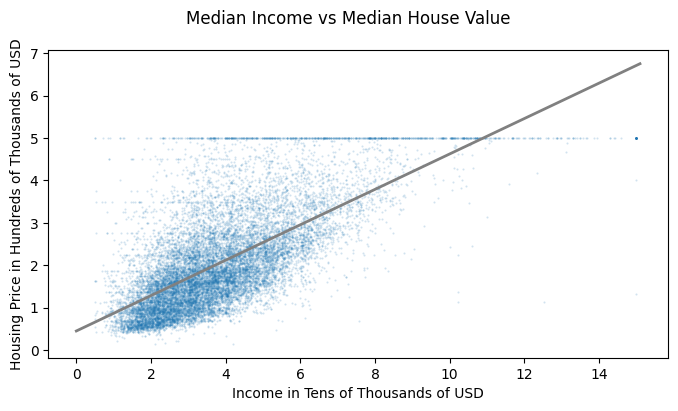

In [654]:
# Your Turn - 5

fig, axs = plt.subplots(1,1, figsize = (8,4))
fig.suptitle("Median Income vs Median House Value")
plt.plot(train_x["MedInc"], train_y["MedHouseVal"], "o", markersize=.5, alpha=.2)
axs.set_xlabel("Income in Tens of Thousands of USD")
axs.set_ylabel("Housing Price in Hundreds of Thousands of USD")

# Generate a range of possible incomes from 0 to the maximum age on record
inc_range = np.arange(0, (train_x["MedInc"].max() + .1), .1)

# Predict housing value
pred_house_val = reg_obj_inc.predict(inc_range.reshape(-1,1))

# Plot regression line
plt.plot(inc_range.reshape(-1,1), pred_house_val, color="grey", linewidth=2)

plt.show()

<h3 class="yt">Your Turn - 6</h3>

Evaluate the fit of the model on the <b><i>test data</i></b> you created in <span class = "yt">Your Turn - 1</span>. Do this by calculating the <b><i>RMSE</i></b> and <b><i>R^2</i></b>. Briefly explain how well your model does. 

In [655]:
# Your Turn - 6

# Make prediction using the test set
mi_test_x = test_x["MedInc"].values.reshape(-1,1)

pred_y_inc = reg_obj_inc.predict(mi_test_x)

# Calculate RMSE
rmse_test = mean_squared_error(test_y, pred_y_inc, squared = False)
print(rmse_test)

# Calcualte R2
r2_test = r2_score(test_y, pred_y_inc)
print(r2_test)

0.8430087153316839
0.48490837623606453


<b><i>Your Turn 6 - Additional Answer</i></b>

The RMSE for the model is relatively low. The R^2 value is moderately high. This indicates a moderately strong linear relationship.

<h3 class="yt">Your Turn - 7</h3>

The average income for households in a block group is $45,987 dollars. Estimate the median house value of houses in that block group with your fitted model. Print the result in USD. 

In [656]:
# Your Turn - 7

print("${:,.2f}".format(reg_obj_inc.predict([[4.5987]])[0][0] * 100000))

$236,875.56


<h3 class="yt">Your Turn - 8</h3>

Use the <b><i>SelectKBest</i></b> class to choose <span class = "num">3</span> feature variables for a multivariate linear regression model. Display the selected features. 

In [657]:
# Your Turn - 8

best_feat = SelectKBest(score_func=f_regression, k=3).fit(train_x, train_y["MedHouseVal"])
cols_selected = list(train_x.columns[best_feat.get_support(indices=True)])
print("Selected features:", *cols_selected)

Selected features: MedInc AveRooms Latitude


<h3 class="yt">Your Turn - 9</h3>

Fit a multivariate linear regression model on the 3 features selected in <span class = "yt">Your Turn - 8</span>. What is the equation of the fitted model? 

In [658]:
# Your Turn - 9

# Fit model
multivar_reg = LinearRegression(fit_intercept=True).fit(train_x[cols_selected], train_y["MedHouseVal"])

# Print coefficients of fitted model
print(multivar_reg.coef_)
print(multivar_reg.intercept_)

[ 0.42609309 -0.02970196 -0.0443332 ]
2.156736372295831


<b><i>Your Turn 9 - Additional Answer</i></b>

The equation of the fitted model is in the form: $y = .4261x_1 - .0297x_2 - 0.0443x_3 + 2.1567$.

<h3 class="yt">Your Turn - 10</h3>

Calculate the <b><i>RMSE</i></b> and <b><i>R^2</i></b> values on the test data with the fitted multivariate linear regression model. Is this fitted multivariate regression model a better model than the univariate regression model from <span class = "yt">Your Turn - 4</span>? 

In [659]:
# Your Turn - 10

# Make prediction using the test set
pred_y_inc = multivar_reg.predict(test_x[cols_selected])

# Calculate RMSE
rmse_test = mean_squared_error(test_y, pred_y_inc, squared = False)
print(rmse_test)

# Calcualte R2
r2_test = r2_score(test_y, pred_y_inc)
print(r2_test)


0.8318060991418281
0.4985073648213547


<b><i>Your Turn 10 - Additional Answer</i></b>

The RMSE for the multivariate model is lower. The R^2 value is higher. This indicates that the multivariate model is slightly better.